# Probability of having a sister

## Question:

https://platform.stratascratch.com/technical/2368-probability-of-having-a-sister?tabname=question

Assume the distribution of children per family is as given in the table below:


| n_children | 0   | 1    | 2   | 3    | 4   | >=5 |
|------------|-----|------|-----|------|-----|-----|
| p          | 0.3 | 0.25 | 0.2 | 0.15 | 0.1 | 0   |

Consider a random girl in the population of children. What is the probability that she has a sister?

## (wrong) Solution

### Strategy:

1) We assume that the probability of a child being boy/girl is independent and equal
2) We are interested in the probability that a randomply picked girl in the children population has - at least - one sister. In other words, we are interested in the probability that in a family there are at least 2 girls, conditioned on the fact that there is at least one girl:

$$P(g \geq 2 | g \geq 1) = \frac{P(g \geq 2 \cap g \geq 1)}{P(g \geq1)}= \frac{P(g \geq 2)}{P(g \geq1)} $$

where the last equality holds because all families with at least 2 girls also have at least 1 girl.

We then have to compute $P(g\geq k)$ with $k=1,2$, as a function of the probability of a family having a number $n$ of children.

$$P(g \geq k) = \sum_{i=0,...,4} P (g \geq k | n = i) \cdot P(n=i)$$


$$\begin{aligned}P(g \geq 1) &= P (g \geq 1 | n = 1) \cdot P(n=1) +P (g \geq 1 | n = 2) \cdot P(n=2) + P (g \geq 1 | n = 3) \cdot P(n=3) + P (g \geq 1 | n = 4) \cdot P(n=4) =  \\
&= 0.5 \cdot P(n=1) + (1- 0.5^2) \cdot P(n=2) + (1-0.5^3) \cdot P(n=3) + (1-0.5^4) \cdot P(n=4) 
\end{aligned}$$

We then need to compute $P (g \geq 2 | n = i)$: for $n=2$ it's straihtforward, it's the probability that both children are girls, so $1/4$. What about $n=3 ,4$?

$$\begin{aligned}P(g \geq 2) &= P (g \geq 2 | n = 2) \cdot P(n=2) + P (g \geq 2 | n = 3) \cdot P(n=3) + P (g \geq 2 | n = 4) \cdot P(n=4) =  \\
&= 0.5^2 \cdot P(n=2) + 0.5^3 \cdot 4 \cdot P(n=3) + (1-0.5^4 \cdot 5) \cdot P(n=4) 
\end{aligned}$$

Plugging numbers we get:

$$P(g \geq 2 | g \geq 1) =  0.3875$$


## Right solution:

In order to answer the question we can recast it in the following way: if I pick a random girl in the pool of kids, what are the chances that she belongs in a family with more than 2 girls? This can be computed as a ratio between the number of girls that satisfy the hypothesis $N(g \geq 2)$ and the total number of girls $N(g)$

In [330]:
prob_distribution_base={0: 0.3, 1: 0.25, 2: 0.2, 3: 0.15, 4: 0.1, 5: 0}

In [331]:
prob_distribution = {0: 0.1, 1: 0.0, 2: 0.0, 3: 0., 4: 0.9, 5: 0}


In [332]:
p1=(0.5*prob_distribution[1]+(1-0.5**2)*prob_distribution[2]+(1-0.5**3)*prob_distribution[3]+(1-0.5**4)*prob_distribution[4])
p2=(0.5**2*prob_distribution[2]+(0.5**3)*4*prob_distribution[3]+(1-5*0.5**4)*prob_distribution[4])
print('p1 = ', p1, 'p2 = ', p2, ', probability = ', p2/p1)

p1 =  0.84375 p2 =  0.61875 , probability =  0.7333333333333334


In [333]:
num=  (1/3*  prob_distribution[2]+4/7*  prob_distribution[3]+11/15* prob_distribution[4])
den=prob_distribution[1]*0.5+3./4. * prob_distribution[2]+ 7./8. * prob_distribution[3] + 14/15 * prob_distribution[4]

In [334]:
num/den

0.7857142857142856

In [335]:
import random
import pandas as pd
import numpy as np
from scipy.stats import binom


In [336]:
p=0.5 #probability of a kid being boy/girl

numerator=(2*binom.pmf(2,2,p)*prob_distribution[2]+prob_distribution[3]*(2*binom.pmf(2,3,p)+3*binom.pmf(3,3,p))+prob_distribution[4]*(2*binom.pmf(2,4,p)+3*binom.pmf(3,4,p)+4*binom.pmf(4,4,p)))
denominator= 0.5*(prob_distribution[1]+2*prob_distribution[2]+3*prob_distribution[3]+4*prob_distribution[4])
solution=numerator/denominator
solution

0.8750000000000001

In [350]:
for n in prob_distribution.keys():
    print(n, prob_distribution[n])

0 0.1
1 0.0
2 0.0
3 0.0
4 0.9
5 0


In [390]:
def compute_solution(prob_distribution,p=0.5):
    '''todo: rewrite in more general way'''
    print(prob_distribution)
    num=0
    for n in prob_distribution.keys():
        partial=0
        for i in np.arange(2,n+1):
            partial+=i*binom.pmf(i,n,p)
        if n>=2:
            aaa=partial*prob_distribution[n]
            print('partial for n =', n , ' = ',aaa)
            num+=aaa
    print('numerator =',num)
    den=0
    for n in prob_distribution.keys():
        den+=n*prob_distribution[n]
    den=den*0.5
    print('den=',den)
    #numerator=(2*binom.pmf(2,2,p)*prob_distribution[2]+prob_distribution[3]*(2*binom.pmf(2,3,p)+3*binom.pmf(3,3,p))+prob_distribution[4]*(2*binom.pmf(2,4,p)+3*binom.pmf(3,4,p)+4*binom.pmf(4,4,p)))
    #denominator= 0.5*(prob_distribution[1]+2*prob_distribution[2]+3*prob_distribution[3]+4*prob_distribution[4])
    solution=num/den
    print('numerator = {}\ndenominator={}\nsolution={}'.format(num,den,solution))
    return solution


In [391]:
compute_solution(prob_distribution=prob_distribution)

{0: 0.1, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.9, 5: 0}
partial for n = 2  =  0.0
partial for n = 3  =  0.0
partial for n = 4  =  1.5750000000000002
partial for n = 5  =  0.0
numerator = 1.5750000000000002
den= 1.8
numerator = 1.5750000000000002
denominator=1.8
solution=0.8750000000000001


In [339]:
n=4
x=np.arange(0,n+1)
print(x)
for i in x:
    print( binom.cdf(i, n, p))
print('\n')
for i in x:
    print( binom.pmf(i, n, p))

[0 1 2 3 4]
0.0625
0.3125
0.6875
0.9375
1.0


0.0625
0.25
0.375
0.25000000000000006
0.0625


## Simulation:

Now let's check if the result is right with a simple simullation:

In [340]:
def generate_sample(probdict,sample_size=100000):
    families = []
    for i in range(sample_size):
        n_children = random.choices(list(prob_distribution.keys()), weights=list(prob_distribution.values()))[0]
        family = {"n_children": n_children}
        if n_children > 0:
            family["n_girls"] =  np.random.binomial(n_children, 0.5)# the sex of each child is basically a coin toss, therefore we need to use a binomial distribution
            family["n_boys"] = n_children - family["n_girls"]
        else:
            family["n_girls"]=0
            family["n_boys"]=0
        families.append(family)
    return pd.DataFrame.from_dict(families)



In [341]:
df=generate_sample(prob_distribution,1000000)



array([[<AxesSubplot: title={'center': 'n_children'}>,
        <AxesSubplot: title={'center': 'n_girls'}>],
       [<AxesSubplot: title={'center': 'n_boys'}>, <AxesSubplot: >]],
      dtype=object)

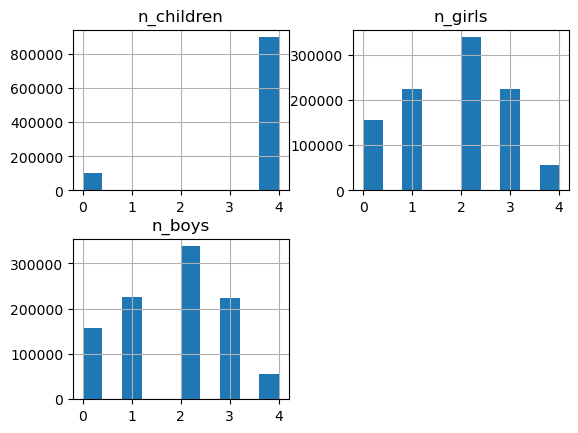

In [342]:
df.hist()

array([[<AxesSubplot: title={'center': 'n_children'}>,
        <AxesSubplot: title={'center': 'n_girls'}>],
       [<AxesSubplot: title={'center': 'n_boys'}>, <AxesSubplot: >]],
      dtype=object)

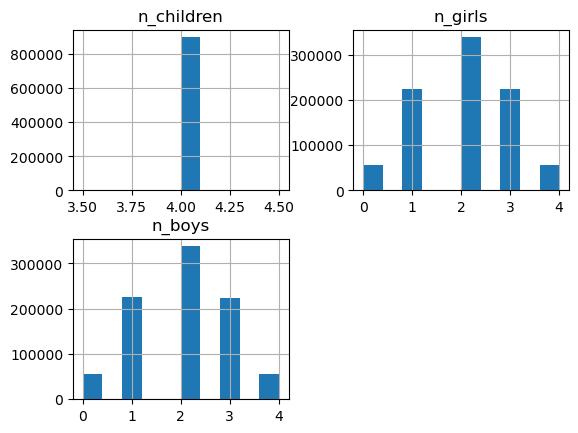

In [349]:
df[df['n_children']==4].hist()

In [344]:
twogirls=df[df['n_girls']>=2].count()
onegirl=df[df['n_girls']>=1].count()


In [345]:
#girls in families with more than 1 girl
g2=df[df['n_girls']>=2].sum()['n_girls']
g2

1575043

In [346]:

totalgirls=df.sum()['n_girls']
totalgirls

1799639

In [347]:
g2/totalgirls

0.8751994149937848

In [348]:
ratio=twogirls[0]/onegirl[0]
ratio

0.7337443022518331